## Common Imports

In [1]:
import numpy as np
import os, sys
import keras
import keras.backend as K

#Instantiate plotting tool
#In Jupyter notebooks, you will need to run this command before doing any plotting
%matplotlib inline

Using TensorFlow backend.


## Configure Tensorflow

In [2]:
def limit_mem():
    K.get_session().close() #new line lets you reset GPU memory without closing notebook
    cfg = K.tf.ConfigProto()
    cfg.gpu_options.allow_growth = True
    K.set_session(K.tf.Session(config=cfg))
limit_mem()

## Organize Image Files for Classification

TODO: Update this code to be more realistic for how Imagenet images are zipped and arranged

The starting data directory needs to be arranged like this:
```
    data/
      projectname/
          train/
              cat.437.jpg
              dog.9924.jpg
              cat.1029.jpg
              dog.4374.jpg
          test/
              231.jpg
              325.jpg
              1235.jpg
              9923.jpg
```

In [3]:
DATA_DIR = '/home/bfortuner/workplace/data/catsdogs/'
TRAIN_DIR = DATA_DIR+'train/'
VALID_DIR = DATA_DIR+'valid/'       
SAMPLE_DIR = DATA_DIR+'sample/'

#This is data you submit to Kaggle
TEST_DIR = DATA_DIR+'test/' #unknown/' #I think Keras requires unknown?

In [4]:
print(TRAIN_DIR)

/home/bfortuner/workplace/data/catsdogs/train/


In [5]:
%cd $DATA_DIR

/home/bfortuner/workplace/data/catsdogs


### Create directories

We copy a subset of the data into a "sample" directory for faster training iterations

In [6]:
%cd $DATA_DIR
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test

/home/bfortuner/workplace/data/catsdogs
mkdir: cannot create directory ‘valid’: File exists
mkdir: cannot create directory ‘results’: File exists


### Create Validation Set

We MOVE files from the training set to the validation directory. We don't copy them!

In [7]:
from glob import glob

%cd $TRAIN_DIR
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): ##2000 is a subset of the total
    os.rename(shuf[i], VALID_DIR + shuf[i])

/home/bfortuner/workplace/data/catsdogs/train


IndexError: index 0 is out of bounds for axis 0 with size 0

### Create Sample Training Set

In [ ]:
from shutil import copyfile

# Copy training to sample training
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(300): 
    copyfile(shuf[i], SAMPLE_DIR+'train/' + shuf[i])
    
# Copy validation to sample validation
%cd $VALID_DIR
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(75): 
    copyfile(shuf[i], SAMPLE_DIR+'valid/' + shuf[i])

### Rearrange Images Into Respective Directories

In [ ]:
#Divide cat/dog images into separate directories

%cd $SAMPLE_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $SAMPLE_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $VALID_DIR
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $TRAIN_DIR
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

# Create single 'unknown' class for test set
%cd $TEST_DIR
%mv *.jpg unknown/

## Load Prepacked Data From Keras (MNIST)

In [6]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
# Target Y
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [8]:
# Input X
print(X_train.shape)
print (X_train[:2])
print ("Single Image - Number looks like")
print (X_train[0])
print (X_train[0].shape)

(60000, 28, 28)
[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]
Single Image - Number looks like
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 24

## Visualize and Explore Images

In [9]:
from PIL import Image
import random

def get_paths_to_files(dir_path):
    filepaths = []
    for (dirpath, dirnames, filenames) in os.walk(dir_path):
        filepaths.extend(os.path.join(dirpath, f) for f in filenames)
    return filepaths

def get_random_image_path(dir_path):
    filepaths = get_paths_to_files(dir_path) 
    return filepaths[random.randrange(len(filepaths))]

DOGS_DIR = TRAIN_DIR+'dogs/'
print (get_random_image_path(DOGS_DIR))
print (get_random_image_path(TRAIN_DIR))

/home/bfortuner/workplace/data/catsdogs/train/dogs/dog.12045.jpg
/home/bfortuner/workplace/data/catsdogs/train/dogs/dog.9387.jpg


### View image

In [10]:
img_path = get_random_image_path(DOGS_DIR)

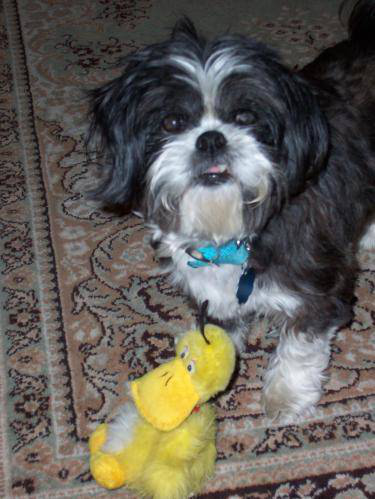

In [11]:
# View image with PIL
img = Image.open(img_path)
img

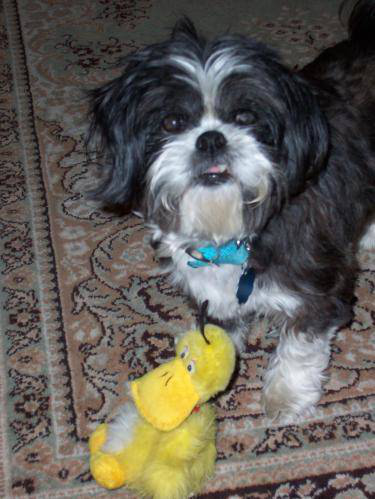

In [12]:
# View Image w Keras
from keras.preprocessing.image import load_img, img_to_array

load_img(img_path)

In [13]:
import matplotlib.pyplot as plt

# Plot numpy array image
def plot_img_array(img_arr):
    plt.imshow(img_arr.astype('uint8'))
    plt.show()

img = load_img(img_path)
img_arr = img_to_array(img)
plot_img_array(img_arr)

## Preprocess Images

Reshape, Subtract Mean, etc.

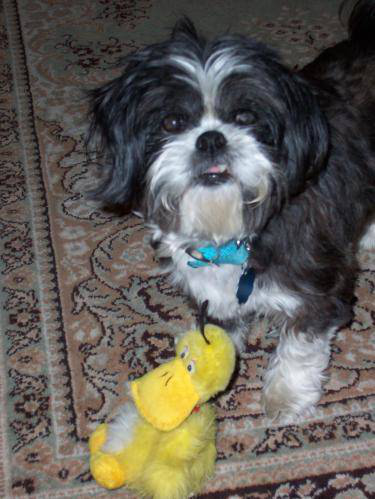

In [14]:
# Load image
img = load_img(img_path)
img

In [15]:
# (Width, Height) of img
print (img.size)

# Convert To Numpy Array
img_arr = img_to_array(img)
print(img_arr[0][:5])

# Get Shape (Height, Width, Channel) (Rows,Cols,Depth) <-- Height First? Unlike PIL.Image
print (img_arr.shape)

(375, 499)
[[ 32.  27.  24.]
 [ 35.  30.  27.]
 [ 46.  41.  38.]
 [ 58.  53.  50.]
 [ 63.  58.  55.]]
(499, 375, 3)


(500, 500, 3)


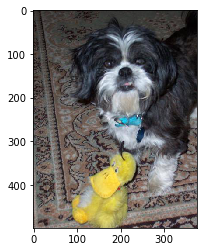

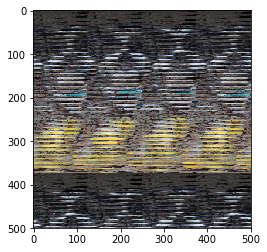

In [16]:
# Numpy Img Array Resize
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.resize.html
img_arr = img_to_array(img)
cp_img = np.copy(img_arr)
cp_img = np.resize(cp_img,(500,500,3))
print(cp_img.shape)

plot_img_array(img_arr)
plot_img_array(cp_img)

In [17]:
#Numpy reshape image
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
img_arr = img_to_array(img)
cp_img = np.copy(img_arr)
print(cp_img.shape)
cp_img = cp_img.reshape((327,306,3))
print(cp_img.shape)

plot_img_array(img_arr)
plot_img_array(cp_img)

(499, 375, 3)


ValueError: total size of new array must be unchanged

### Resize Image

Using percentagewise scaling or distortion if fixed dimensions provided

(499, 375, 3)
(249, 187, 3)


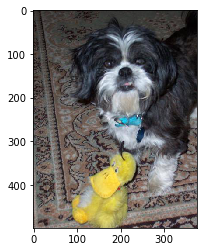

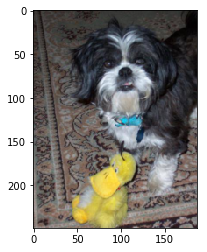

In [18]:
from scipy.misc import imresize
#Scipy imresize
#https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.misc.imresize.html
#Interpolation to use for re-sizing (‘nearest’, ‘lanczos’, ‘bilinear’, ‘bicubic’ or ‘cubic’).

img_arr = img_to_array(img)
cp_img = np.copy(img_arr)
print(cp_img.shape)

#Resize proportionally passing in percentage
cp_img = imresize(cp_img,50)
print(cp_img.shape)

plot_img_array(img_arr)
plot_img_array(cp_img)

(50, 100, 3)


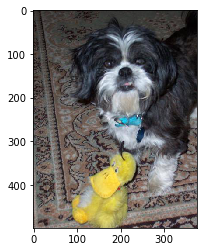

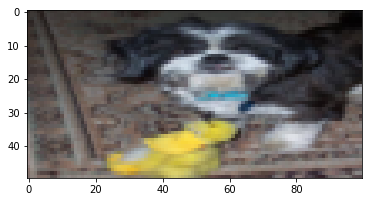

In [19]:
#Resize to specific dimensions w distortion
#If the dimensions don't make sense it 
# will distort things not crop
cp_img = np.copy(img_arr)
cp_img = imresize(cp_img,(50,100,3))
print(cp_img.shape)

plot_img_array(img_arr)
plot_img_array(cp_img)

### Crop Image Array

(100, 300, 3)


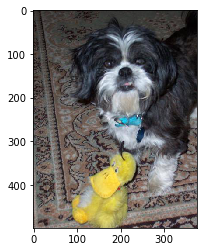

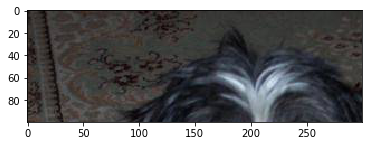

In [20]:
# Crop Image
#If the dimensions don't make sense it 
# will distort things not crop
cp_img = np.copy(img_arr)
cp_img = cp_img[:100,:300,:]   #Cropping the height
print(cp_img.shape)

plot_img_array(img_arr)
plot_img_array(cp_img)

In [21]:
# Alternative image manipulation using OpenCV
#http://www.pyimagesearch.com/2014/01/20/basic-image-manipulations-in-python-and-opencv-resizing-scaling-rotating-and-cropping/

### Center-Cropping

In [22]:
from PIL import Image
new_s = 128 # height and width to resize to

In [23]:
def _resize(img):
    shortest = min(img.width,img.height)
    resized = np.round(np.multiply(new_s/shortest, img.size)).astype(int)
    return img.resize(resized, Image.BILINEAR)

In [24]:
def resize_img(file_path):
    img = Image.open(file_path)
    s = np.array(img).shape
    if len(s)!=3 or s[2]!=3: 
        return
    return _resize(img)

In [25]:
def black_and_white(img):
    #black white transform
    return img.convert('L')

In [26]:
def get_slice(p, n):
    return slice((p-n+1)//2, p-(p-n)//2)

In [27]:
def center_crop(img, new_s):
    return np.array(img)[get_slice(img.size[1],new_s), get_slice(img.size[0],new_s)]

In [28]:
img_path = get_random_image_path(DOGS_DIR)

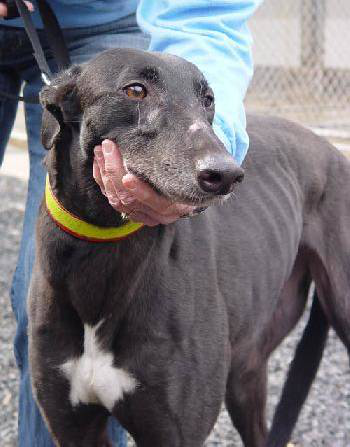

In [29]:
img = Image.open(img_path)
img

In [30]:
img.size

(350, 447)

(128, 163)


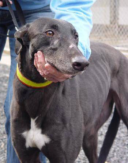

In [31]:
rimg = resize_img(img_path)
print(rimg.size)
rimg

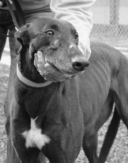

In [32]:
bw_rimg = black_and_white(rimg)
bw_rimg

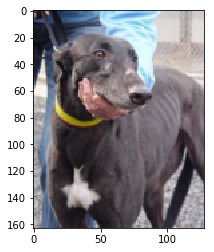

In [33]:
rimg_arr = np.array(rimg)
plot_img_array(rimg_arr)

In [34]:
img.size

(350, 447)

In [35]:
cc_img = center_crop(rimg, new_s)
cc_img[:1]

array([[[ 25,  24,  28],
        [ 20,  19,  24],
        [ 20,  19,  25],
        [ 20,  18,  26],
        [ 26,  24,  34],
        [ 25,  24,  35],
        [ 20,  22,  31],
        [ 19,  22,  31],
        [ 20,  23,  31],
        [ 21,  24,  32],
        [ 19,  22,  31],
        [ 21,  23,  32],
        [ 55,  55,  67],
        [ 82,  83,  95],
        [ 80,  83,  94],
        [ 58,  63,  73],
        [ 25,  32,  42],
        [ 28,  33,  44],
        [ 34,  34,  48],
        [ 40,  39,  52],
        [ 41,  38,  50],
        [ 40,  36,  47],
        [ 38,  32,  42],
        [ 35,  31,  40],
        [ 31,  31,  43],
        [ 27,  33,  51],
        [ 34,  45,  67],
        [ 51,  63,  85],
        [ 60,  71,  91],
        [ 66,  82, 100],
        [ 69,  87, 106],
        [ 71,  88, 109],
        [ 77,  92, 114],
        [ 80,  95, 118],
        [ 84,  98, 122],
        [ 86,  99, 123],
        [ 91, 103, 126],
        [103, 111, 131],
        [123, 126, 143],
        [126, 126, 139],


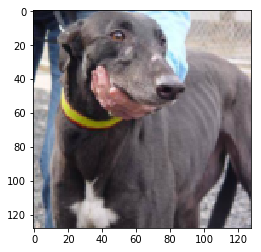

(128, 128, 3)

In [36]:
plot_img_array(cc_img)
cc_img.shape

### Track Time of Operation

In [37]:
%time 4+3

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.81 µs


7

## CNN for Multi-class Classification

In [38]:
DATA_DIR = '/home/bfortuner/workplace/data/catsdogs/sample/'
TRAIN_DIR = DATA_DIR+'train/'
VALID_DIR = DATA_DIR+'valid/'

In [39]:
# Let's do Cats/Dogs
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Dropout, Flatten
from keras.layers.normalization import BatchNormalization

model = Sequential([
        # this applies 32 convolution filters of size 3x3 each.
        Convolution2D(32, 3, 3, input_shape=(128, 128, 3)),
        Activation('relu'),
        Convolution2D(32, 3, 3),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        # Note: Keras does automatic shape inference.
        # Mean i think it handles converting into 10 neuron dense layer
        Dense(32),
        Activation('relu'),
        Dense(2),
        Activation('softmax')
])

model = Sequential([
        # this applies 32 convolution filters of size 3x3 each.
        Convolution2D(32,3,3, input_shape=(224, 224, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((3,3)),
        Convolution2D(64,3,3, activation='relu'),
        BatchNormalization(),
        MaxPooling2D((3,3)),
        Flatten(),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        Dense(2, activation='softmax')
    ])

In [40]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator()

In [41]:
train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 224x224
        batch_size=32,
        class_mode='categorical')  # multiclass categorization

# this is a similar generator, for validation data
valid_generator = train_datagen.flow_from_directory(
        VALID_DIR,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 300 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


In [42]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Manually initialize optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [43]:
print(train_generator.nb_sample)
print(valid_generator.nb_sample)

300
75


In [44]:
model.fit_generator(
        train_generator,
        samples_per_epoch=train_generator.nb_sample,
        nb_epoch=2,
        validation_data=valid_generator,
        nb_val_samples=valid_generator.nb_sample)
model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/2
300/300 [==============================] - 3s - loss: 1.5704 - acc: 0.5400 - val_loss: 2.8161 - val_acc: 0.6267
Epoch 2/2
300/300 [==============================] - 1s - loss: 0.4036 - acc: 0.8133 - val_loss: 1.6174 - val_acc: 0.6667

### Load Weights From File

In [102]:
#model.save_weights('first_try.h5')
model.load_weights('first_try.h5')

In [103]:
# Run again with saved weights
model.fit_generator(
        train_generator,
        samples_per_epoch=train_generator.nb_sample,
        nb_epoch=15,
        validation_data=valid_generator,
        nb_val_samples=valid_generator.nb_sample)

Epoch 1/15
300/300 [==============================] - 2s - loss: 0.3459 - acc: 0.8567 - val_loss: 3.8719 - val_acc: 0.3867
Epoch 2/15
300/300 [==============================] - 2s - loss: 0.2679 - acc: 0.8867 - val_loss: 2.4807 - val_acc: 0.4533

## Linear Model for Regression

In [350]:
#https://archive.ics.uci.edu/ml/datasets/Housing
from keras.utils.data_utils import get_file

housing_url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
housing_data_file_path = get_file('housing.data',housing_url)

import pandas as pd
# Import Housing Data
dataframe = pd.read_csv(housing_data_file_path, delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [351]:
## Train/Test Split
X_train = X[:400]
Y_train = Y[:400]
X_test = X[400:]
Y_test = Y[400:]

In [358]:
model = Sequential()
model.add(Dense(10, input_dim=13))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, nb_epoch=1000, batch_size=64,verbose=0)
score = model.evaluate(X_test, Y_test, batch_size=64)
print ("\n score: "+ str(score))

 64/106 [=================>............] - ETA: 0s
 score: 24.7666778924


## Finetune VGG 

### Download weights from URL

In [114]:
PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/'
TF_WEIGHTS = 'vgg16_weights_tf_dim_ordering_tf_kernels.h5'
TF_WEIGHTS_NO_TOP = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
#https://keras.io/applications/#fine-tune-inceptionv3-on-a-new-set-of-classes

from keras.utils.data_utils import get_file
vgg_weights_no_top_path = get_file(TF_WEIGHTS_NO_TOP, PATH+TF_WEIGHTS_NO_TOP, cache_subdir='models')

In [115]:
from keras.applications.vgg19 import VGG19
vgg = VGG19(include_top=False, weights='imagenet',
               input_tensor=None, input_shape=(224,224,3))

vgg.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_16 (InputLayer)            (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 224, 224, 64)  1792        input_16[0][0]                   
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 224, 224, 64)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 112, 112, 64)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

### Create Model On Top of VGG (for final layers)

In [116]:
from keras.models import Model

# add a global spatial average pooling layer
x = vgg.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
model = Model(input=vgg.input, output=predictions)

In [117]:
# first: train only the top layers (which were randomly initialized)
for layer in vgg.layers:
    layer.trainable = False

In [118]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [119]:
model.fit_generator(
        train_generator,
        samples_per_epoch=train_generator.nb_sample,
        nb_epoch=10,
        validation_data=valid_generator,
        nb_val_samples=valid_generator.nb_sample)

Epoch 1/10
300/300 [==============================] - 2s - loss: 0.8752 - val_loss: 0.7925
Epoch 2/10
300/300 [==============================] - 2s - loss: 0.2653 - val_loss: 0.9455

In [120]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(vgg.layers):
    print(i, layer.name)

0 input_16
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool


In [121]:
#Let's freeze all layers except last 2
#Let's retrain last two layers
print (len(vgg.layers))
vgg.layers[-4:]

for layer in model.layers[:-4]:
    layer.trainable = False
for layer in model.layers[-4:]:
    layer.trainable = True

22


In [122]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 4 VGG layers
# alongside the top Dense layers
model.fit_generator(
        train_generator,
        samples_per_epoch=train_generator.nb_sample,
        nb_epoch=15,
        validation_data=valid_generator,
        nb_val_samples=valid_generator.nb_sample)

Epoch 1/15
300/300 [==============================] - 2s - loss: 0.0032 - val_loss: 0.0541
Epoch 2/15
300/300 [==============================] - 2s - loss: 1.1999e-04 - val_loss: 0.0176

## Making Predictions

In [199]:
#Generate Predictions from Image Generator 
# model.predict() takes a numpy array
preds = model.predict_generator(valid_generator, val_samples=valid_generator.nb_sample)
print (len(preds))
print (preds)

75
[[  1.46893939e-07   9.99999881e-01]
 [  2.58760110e-06   9.99997377e-01]
 [  1.00000000e+00   2.32072583e-09]
 [  1.00000000e+00   6.81968440e-11]
 [  1.66223742e-06   9.99998331e-01]
 [  3.18732276e-08   1.00000000e+00]
 [  9.99982834e-01   1.71687825e-05]
 [  9.99997258e-01   2.70715736e-06]
 [  1.00000000e+00   1.81394844e-09]
 [  9.62471586e-06   9.99990344e-01]
 [  6.42935446e-15   1.00000000e+00]
 [  4.96656549e-10   1.00000000e+00]
 [  9.99949932e-01   5.00816459e-05]
 [  9.99982834e-01   1.71686843e-05]
 [  1.00000000e+00   4.05785876e-08]
 [  9.99996543e-01   3.48515482e-06]
 [  7.75095377e-10   1.00000000e+00]
 [  9.99999762e-01   2.92964899e-07]
 [  9.61395460e-12   1.00000000e+00]
 [  8.03733682e-17   1.00000000e+00]
 [  1.00000000e+00   1.46792283e-11]
 [  9.99977231e-01   2.27265136e-05]
 [  1.19997209e-12   1.00000000e+00]
 [  9.99610722e-01   3.89281049e-04]
 [  3.96126125e-18   1.00000000e+00]
 [  9.99974608e-01   2.53600574e-05]
 [  6.49377544e-05   9.99935031e-01

In [208]:
#Round our predictions to 0/1 to generate labels
our_predictions = np.round(preds[:,0],5)
print (our_predictions)
our_labels = np.round(our_predictions)
actual_labels = valid_generator.classes
print (valid_generator.class_indices)
print (our_labels)
print (actual_labels)

[  0.00000000e+00   0.00000000e+00   1.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   9.99979973e-01   1.00000000e+00
   1.00000000e+00   9.99999975e-06   0.00000000e+00   0.00000000e+00
   9.99949992e-01   9.99979973e-01   1.00000000e+00   1.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   9.99979973e-01   0.00000000e+00   9.99610007e-01
   0.00000000e+00   9.99970019e-01   5.99999985e-05   6.60549998e-01
   1.00000000e+00   1.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   3.26579988e-01   0.00000000e+00   0.00000000e+00
   9.91299987e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   0.00000000e+00   1.00000000e+00   1.00000000e+00   9.93629992e-01
   0.00000000e+00   9.99999975e-06   8.33419979e-01   0.00000000e+00
   1.00000000e+00   1.48200002e-02   1.00000000e+00   3.74999992e-03
   0.00000000e+00   1.00000000e+00

In [209]:
#1. A few correct labels at random
correct = np.where(our_labels==actual_labels)[0]
print("Found %d correct labels" % len(correct))
print (len(correct))


Found 44 correct labels
44


In [210]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([load_img(VALID_DIR + test_img_filenames[i]) for i in idx], titles=titles)
    
test_img_filenames = valid_generator.filenames
num_img_to_view=4

['cats/cat.7350.jpg', 'cats/cat.4569.jpg', 'cats/cat.5872.jpg', 'cats/cat.2747.jpg', 'cats/cat.6784.jpg', 'cats/cat.2408.jpg', 'cats/cat.2049.jpg', 'cats/cat.507.jpg', 'cats/cat.6975.jpg', 'cats/cat.1515.jpg', 'cats/cat.2248.jpg', 'cats/cat.3860.jpg', 'cats/cat.1206.jpg', 'cats/cat.12147.jpg', 'cats/cat.1789.jpg', 'cats/cat.6860.jpg', 'cats/cat.12432.jpg', 'cats/cat.10643.jpg', 'cats/cat.10763.jpg', 'cats/cat.7511.jpg', 'cats/cat.6538.jpg', 'cats/cat.7379.jpg', 'cats/cat.11972.jpg', 'cats/cat.2080.jpg', 'cats/cat.72.jpg', 'cats/cat.83.jpg', 'cats/cat.11126.jpg', 'cats/cat.2685.jpg', 'cats/cat.6153.jpg', 'cats/cat.7937.jpg', 'cats/cat.503.jpg', 'cats/cat.10720.jpg', 'cats/cat.1694.jpg', 'cats/cat.431.jpg', 'cats/cat.7970.jpg', 'cats/cat.1472.jpg', 'cats/cat.990.jpg', 'cats/cat.7621.jpg', 'cats/cat.1294.jpg', 'cats/cat.4505.jpg', 'cats/cat.3820.jpg', 'cats/cat.9107.jpg', 'cats/cat.10599.jpg', 'dogs/dog.5939.jpg', 'dogs/dog.11146.jpg', 'dogs/dog.1303.jpg', 'dogs/dog.8605.jpg', 'dogs/dog.6

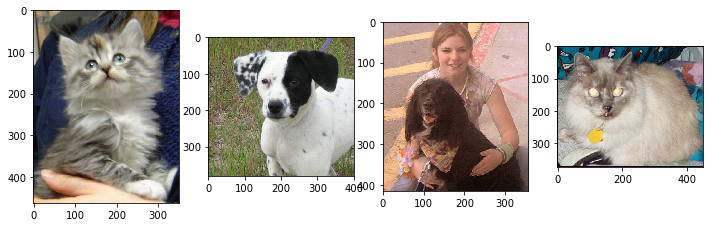

In [211]:
# Plot correct images
print(test_img_filenames)
idx = np.random.permutation(correct)[:num_img_to_view]
print (idx)
plots_idx(idx)

Found 31 incorrect labels


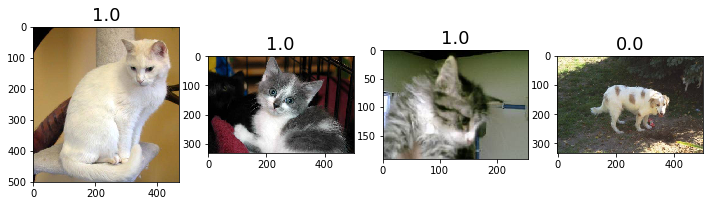

In [212]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=actual_labels)[0]
print("Found %d incorrect labels" % len(incorrect))
idx = np.random.permutation(incorrect)[:num_img_to_view]
plots_idx(idx, our_labels[idx])

Found 22 confident correct cats labels


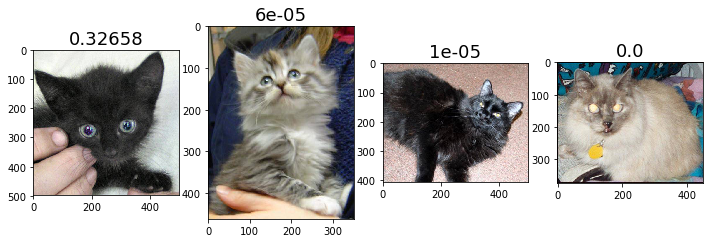

In [213]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0) & (our_labels==actual_labels))[0]
print("Found %d confident correct cats labels" % len(correct_cats))
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:num_img_to_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

Found 22 confident correct dogs labels


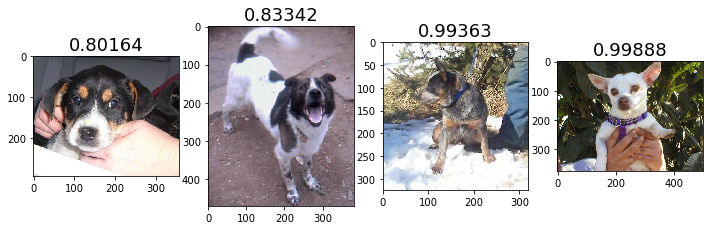

In [214]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==actual_labels))[0]
print("Found %d confident correct dogs labels" % len(correct_dogs))
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:num_img_to_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

Found 10 incorrect cats


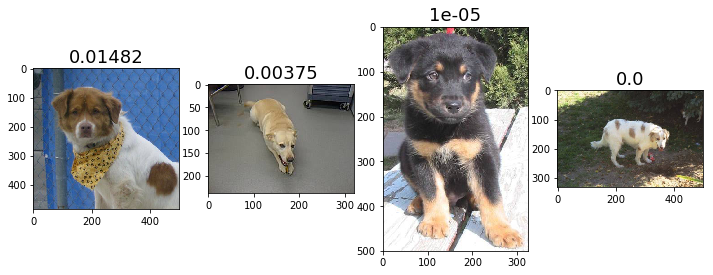

In [215]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=actual_labels))[0]
print("Found %d incorrect cats" % len(incorrect_cats))
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:num_img_to_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

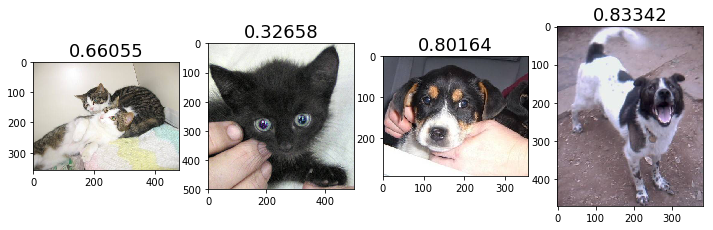

In [217]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:num_img_to_view], our_predictions[most_uncertain])

## Confusion Matrix

In [221]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[22 21]
 [10 22]]


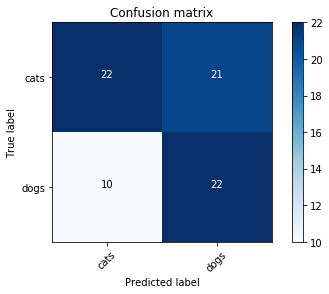

In [222]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual_labels, our_labels)
plot_confusion_matrix(cm, valid_generator.class_indices)

## Inspect + Visualize Activations at CNN layers

## Functional API Example

## Image Augmentation

In [126]:
from keras.preprocessing.image import ImageDataGenerator
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')